In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


### Loading results

loudness, wolfCount, followPreyChance

In [192]:
def extract_results(path, filename):
    a = pd.read_csv(path+filename, engine="python-fwf").iloc[1].dropna().values[0].split(",")
    return np.array(a).astype("int")
    # return pd.read_csv(path+filename).iloc[1].dropna().values.astype("int")

def save_results(arr, loudness, wolfCount, followPreyChance, all_results):
    new_results = pd.DataFrame({"Runtime [turns]":arr, "Howl strength":loudness, "Wolf count":wolfCount, "Chance to follow prey":followPreyChance})
    return pd.concat([all_results, new_results])


In [139]:
def get_string_chance(followPreyChance):
    match followPreyChance:
        case 0:
            return "0"
        case 0.2:
            return "2"
        case 0.5:
            return "5"
        case 1:
            return "1"

In [194]:
def read_results(folder="results_5/"):
    all_results = pd.DataFrame()

    for loudness in [10, 20, 30]:
        for wolfCount in [3, 5, 10]:
            for followPreyChance in [0, 0.2, 0.5, 1]:

                string_chance = get_string_chance(followPreyChance)
                read_data = extract_results(folder, f"{loudness}_{wolfCount}_{string_chance}_results.txt")
                chance = str(followPreyChance*100)+"%"
                all_results = save_results(read_data, loudness, wolfCount, chance, all_results)
    return all_results

all_results = pd.concat([read_results(), read_results("results_30/")])
all_results

,Runtime [turns],Howl strength,Wolf count,Chance to follow prey
0,92,10,3,0%
1,43,10,3,0%
2,173,10,3,0%
3,164,10,3,0%
4,109,10,3,0%
...,...,...,...,...
25,27,30,10,100%
26,29,30,10,100%
27,18,30,10,100%
28,19,30,10,100%


### Making figures

Howl strength - exponential distribution

Wolf count - normal distribution

Chance to follow prey - normal distribution

In [236]:
all_results["Chance to follow prey"].unique()

array(['0%', '20.0%', '50.0%', '100%'], dtype=object)

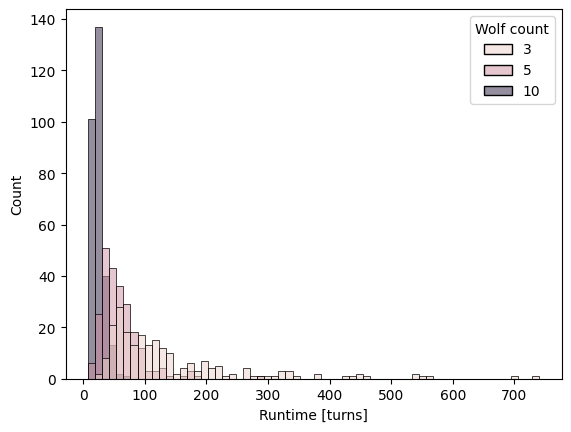

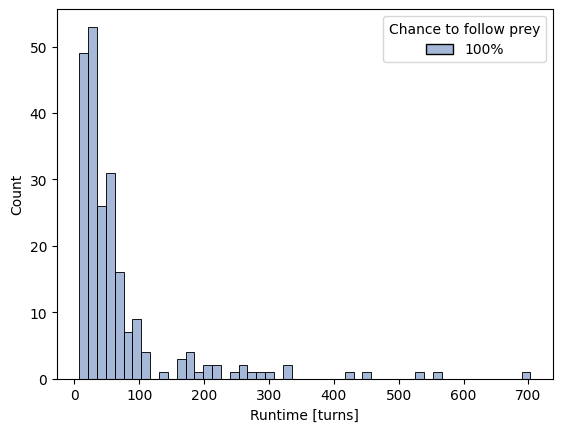

In [257]:
sns.histplot(data=all_results, x="Runtime [turns]", hue="Wolf count", )
plt.show()
sns.histplot(data=all_results[all_results["Chance to follow prey"]=="100%"], x="Runtime [turns]", hue="Chance to follow prey")
plt.show()

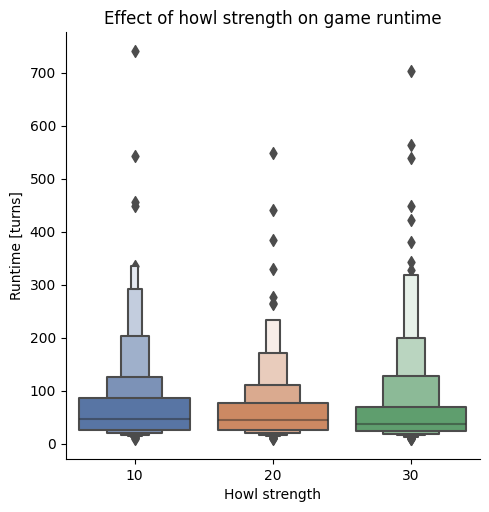

In [221]:
sns.catplot(data=all_results, y="Runtime [turns]", x="Howl strength", kind="boxen", palette="deep")
plt.title("Effect of howl strength on game runtime")
plt.show()

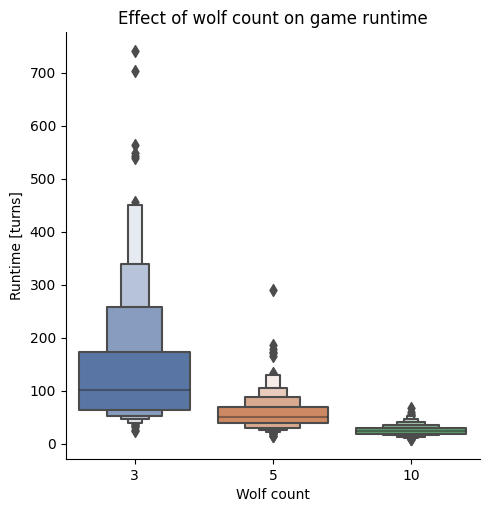

In [202]:
sns.catplot(data=all_results, y="Runtime [turns]", x="Wolf count", kind="boxen")
plt.title("Effect of wolf count on game runtime")
plt.show()

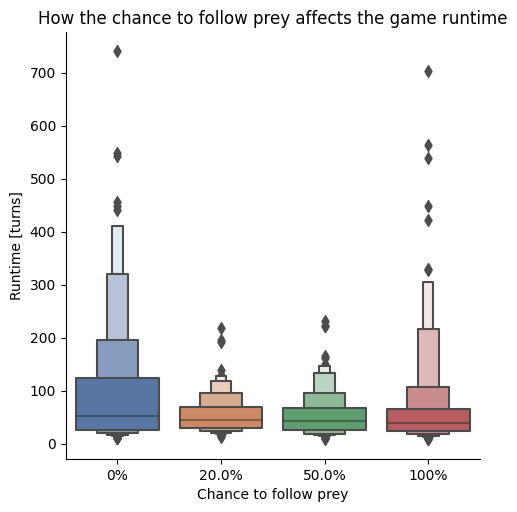

In [203]:
sns.catplot(data=all_results, y="Runtime [turns]", x="Chance to follow prey", kind="boxen")
plt.title("How the chance to follow prey affects the game runtime")
plt.show()

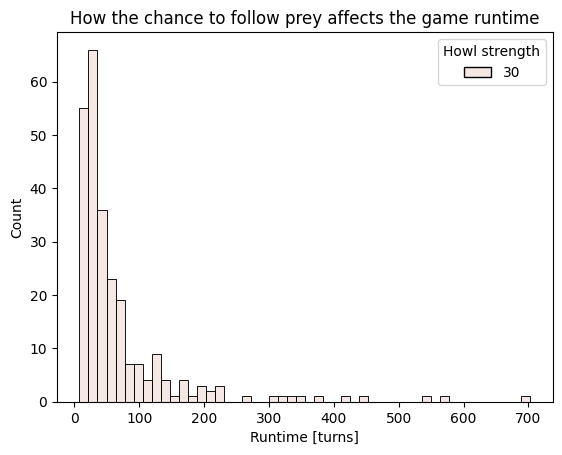

In [333]:
sns.histplot(data=all_results[all_results["Howl strength"]==30], x="Runtime [turns]", hue="Howl strength")
plt.title("How the chance to follow prey affects the game runtime")
plt.show()

### Significance tests

Check if wolf count, howl strength, and chance to follow prey have a significant effect on the game runtime

In [347]:
len(post)-len(pre)

0

100


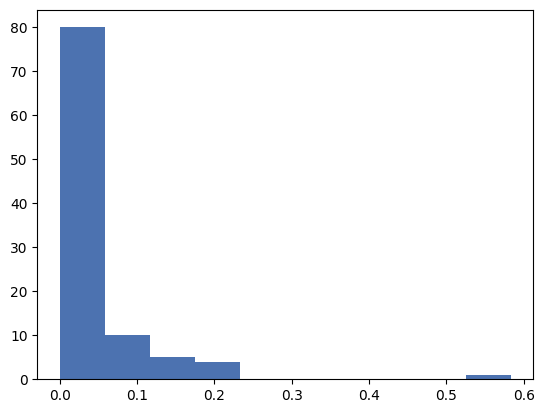

0.036273480392768134


In [390]:
import scipy.stats as stats
p_values = []
name = "Chance to follow prey"

for i in range(100):
    post = all_results[all_results[name]=="0%"]["Runtime [turns]"]
    n2 = post.shape[0]
    pre = all_results[all_results[name]=="100%"]["Runtime [turns]"]
    pre = np.random.choice(pre, n2)

    p = stats.ttest_rel(pre, post)[1]
    p_values.append(p)

p_values = np.array(p_values)
p_values
plt.hist(p_values)
print(len(p_values))
plt.show()
print(p_values.mean())

100


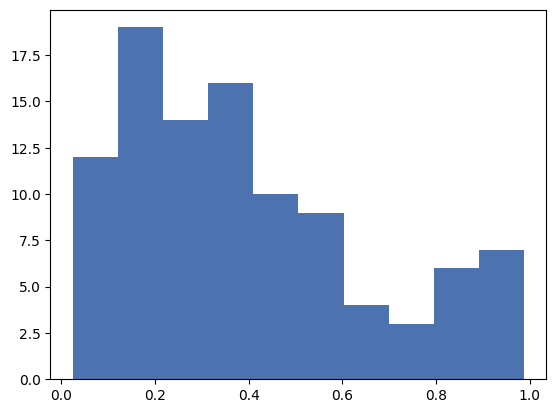

0.3934499286051944


In [382]:
import scipy.stats as stats
p_values = []
name = "Howl strength"

for i in range(100):
    post = all_results[all_results[name]==20]["Runtime [turns]"]
    n2 = post.shape[0]
    pre = all_results[all_results[name]==10]["Runtime [turns]"]
    pre = np.random.choice(pre, n2)

    p = stats.ttest_rel(pre, post)[1]
    p_values.append(p)

p_values = np.array(p_values)
p_values
plt.hist(p_values)
print(len(p_values))
plt.show()
print(p_values.mean())

100


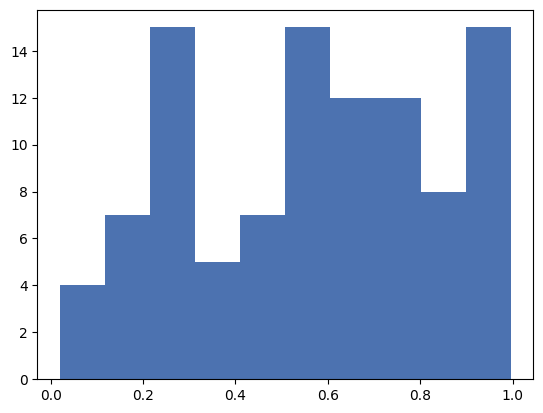

0.5685351779869159


In [381]:
import scipy.stats as stats
p_values = []
name = "Howl strength"

for i in range(100):
    post = all_results[all_results[name]==30]["Runtime [turns]"]
    n2 = post.shape[0]
    pre = all_results[all_results[name]==10]["Runtime [turns]"]
    pre = np.random.choice(pre, n2)

    p = stats.ttest_rel(pre, post)[1]
    p_values.append(p)

p_values = np.array(p_values)
p_values
plt.hist(p_values)
print(len(p_values))
plt.show()
print(p_values.mean())